9.3.1 Writing to a Text File: Introducing the with Statement

In [1]:
# Create an accounts.txt file and write five client records to the file:

with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

Self Check 9.3.1

In [2]:
# 3) Create a grades.txt file and write to it hte following three records consisting of student IDS, last names, 
# and letter grades:
#
#      1 Red A
#      2 Green B
#      3 White A

with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')        
          

9.3.2 - Reading Data from a Text File

In [3]:
# Read records from the file account.txt and display the contents of each record in columns with the 
# Account and Name columns left aligned and the Balance column right aligned, so the decimal points 
# align vertically:

with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


9.3.2 Self Check

In [4]:
# 3) Read the file grades.txt that you created in the previous section's Self Check and display it in columns 
# with the column heads 'ID', 'Name', and 'Grade'.

with open ('grades.txt', mode = 'r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


9.4 Updating Text Files

In [5]:
# use a with statement ot update the accounts.txt file to change account 300's name from 'White'
# to 'Williams'

accounts = open('accounts.txt', 'r')

temp_file = open('temp_file.txt', 'w')

with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

In [6]:
# delete the old accounts.txt file, then rename temp_file.txt as account.txt:

import os

os.remove('accounts.txt')

os.rename('temp_file.txt', 'accounts.txt')

9.4 Self Check

In [7]:
# 3) In the accounts.txt file, update the last name 'Doe' to 'Smith'.

accounts = open('accounts.txt', 'r')

temp_file = open('temp_file.txt', 'w')

with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')
            
import os

os.remove('accounts.txt')

os.rename('temp_file.txt', 'accounts.txt')

9.5 Serialization with JSON

In [8]:
# Create a dictionary 

accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [9]:
# write the object in JSON format to a file (serializing):

import json

with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

In [10]:
# Converting the JSON into a Python object (deserializing):

with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [11]:
#Display the dictionary

accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [12]:
# Get the list of dictionaries associated with the 'accounts' key

accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [13]:
# Get the individual account dictionaries

accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [14]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

In [15]:
# Using dump function to read the JSON from the file and display it in a nicely indented format
# Also called 'pretty printing' the JSON

with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


9.5 Self Check

In [16]:
# 3) Create a JSON file named grades.json and write into it the following dictionary:
#
#     grades_dict = {'gradebook':
#         [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
#          {'student_id': 2, 'name': 'Green', 'grade': 'B'},
#          {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

import json

grades_dict = {'gradebook':
               [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
                {'student_id': 2, 'name': 'Green', 'grade': 'B'},
                {'student_id': 3, 'name': 'White', 'grade': 'A'}]}

with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)
    
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


9.8.2 try Statements

In [17]:
# Use exception handling to catch and handle any ZeroDivisionErrors and ValueErrors that arise

#dividebyzero.py
"""Simple exception handling example"""

while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError: # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError: # denominator was 0
        print('Attempted to divide by zero\n')
    else: # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break # terminate the loop

Enter numerator:  30
Enter denominator:  40


30.000 / 40.000 = 0.750


9.8.2 Self Check

In [26]:
# 3) Before executing the IPython session, determine what the following function displays if you call
# it with the value 10.7 then the value 'Python'?

def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
        
try_it(10.7)

int(10.7) is 10


In [27]:
try_it('Python')

Python could not be converted to an integer


9.9 finally Clause

In [29]:
# Try statment in which no exceptions occur in the try suite

try:
    print('try suite with no exceptions raised')
except:
    print('this will not executes')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [30]:
# Try statement in which an exception occurs in the try suite

try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')


try suite that raises an exception
a ValueError occurred
finally always executes


In [34]:
# Force a FileNotFoundError

open('gradez.txt', 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [37]:
# Catching exceptions like FileNotFoundError

try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}'
except FileNotFoundError:
    print('The file name you specified does not exist')

SyntaxError: invalid syntax (1652240998.py, line 9)

9.9 Self Check

In [38]:
# 3) Before executing the IPython session, determine what the following function displays if you call it with the 
# the value 10.7, then the value 'Python'?:

def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')

try_it(10.7)

int(10.7) is 10
finally executed


In [39]:
try_it('Python')

Python could not be converted to an integer
finally executed


9.12 Intro to Data Science: Working with CSV Files

In [42]:
# Create an accounts.csv file using CSV format

import csv

with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', 42.16])
    writer.writerow([500, 'Rich', 224.62])
    

In [43]:
# Reading from a CSV file

with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone          42.16
500       Rich          224.62


In [44]:
# Load a CSV dataset into a DataFrame with the pandas function read_csv

import pandas as pd

df = pd.read_csv('accounts.csv',
                 names=['account', 'name', 'balance'])

df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,42.16
4,500,Rich,224.62


In [45]:
# Save a DataFrame to a file using CSV format

df.to_csv('accounts_from_dataframe.csv', index=False)

9.12.3 Reading the Titanic Disaster Dataset

In [46]:
# loading data into a DataFrame with read_csv directly from GitHub

import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/' + 'Rdatasets/csv/carData/TitanicSurvival.csv')

In [47]:
# View the first five and last five rows with DataFrame methods head and tail

pd.set_option('display.precision', 2) #format for floating-point values

titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [48]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [49]:
# Changing column names

titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [50]:
# Descriptive statistics

titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [52]:
# Compare the survived column to 'yes' to get a new Series containing True/False values,
# then use describe to summarize the results:

(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

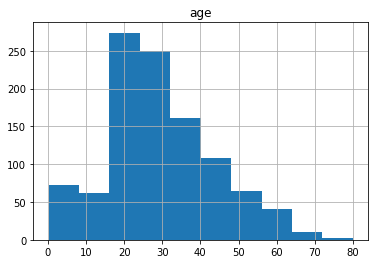

In [55]:
# Passenger age histogram

%matplotlib inline

histogram = titanic.hist()

In [ ]:
brendi kargel